# Milestone 2

In [1]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np 
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

## 1. Experiment Tracking (10%)

Please do this to install comet_ml pip <br>
> conda activate ift6758-conda-env <br>
> conda install pip<br>
> which pip<br>
> pip install comet_ml<br>



In [3]:
!pip install comet_ml
import comet_ml
comet_ml.init()

from comet_ml import Experiment
experiment = Experiment(
    project_name="milestone-2",
    workspace="binulal",
)


COMET INFO: Comet API key is valid
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/binulal/milestone-2/42800c008f0d450e80fd18cf464393c1



## 2. Feature Engineering - I (10%)

* Acquire all of the raw play-by-play data for the 2015/16 season all the way to the 2019/20 season (inclusive).
* Set aside all of the 2019/20 data as your final test set. 
* You will use the 2015/16 - 2018/19 regular season data to create your training and validation sets. 
* Until Part 7, any reference to the “dataset” will exclusively refer to the 2015/16 - 2018/19 data


In [4]:
from ift6758.data.functions import loadstats
from ift6758.data.tidyData_adv import tidyData_adv

In [5]:

dfs_2015 = loadstats(2015,'./data/')
df_2015 = tidyData_adv(dfs_2015)

dfs_2016 = loadstats(2016,'./data/')
df_2016 = tidyData_adv(dfs_2016)

dfs_2017 = loadstats(2017,'./data/')
df_2017 = tidyData_adv(dfs_2017)

dfs_2018 = loadstats(2018,'./data/')
df_2018 = tidyData_adv(dfs_2018)

# dfs_2019 = loadstats(2019,'./data/')
# df_2019 = tidyData_adv(dfs_2019) <---- do this on section# 7

Error code: 404 at gameID:2015021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2015030126. Game not found.
Error code: 404 at gameID:2015030137. Game not found.
Error code: 404 at gameID:2015030146. Game not found.
Error code: 404 at gameID:2015030157. Game not found.
Error code: 404 at gameID:2015030187. Game not found.
Error code: 404 at gameID:2015030216. Game not found.
Error code: 404 at gameID:2015030417. Game not found.
size of data in regular season & playoffs: 1325
Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016030147. Game not found.
Error code: 404 at gameID:2016030176. Game not found.
size of data in regular season & playoffs: 1332


/Users/abhay/Desktop/DS Project/ift6758-project-template-main/ift6758/data/functions.py:530: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arcsin(y/dist)


size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:2018030117. Game not found.
size of data in regular season & playoffs: 1375


/Users/abhay/Desktop/DS Project/ift6758-project-template-main/ift6758/data/functions.py:532: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arcsin(-y/dist)


In [ ]:
sns.scatterplot(data=df_2015, x='coordinates_x', y='coordinates_y')

In [ ]:
# from ift6758.data.functions import fixCoOrdinates
pd.set_option('max_columns', None)
dfs_tidy = df_2015 

# #convert to small image bin coordinates
# dfs_tidy = dfs_tidy[dfs_tidy['coordinates_x'].notna()]#exclude na coordinates
# dfs_tidy = dfs_tidy[dfs_tidy['coordinates_y'].notna()]#exclude na coordinates
   
# #fix and rotate coordinates to relative sides
# #dfs_tidy_new = dfs_tidy.apply(fixCoOrdinates, axis=1, result_type="expand")
# #dfs_tidy.drop( dfs_tidy_new.columns, axis='columns', inplace=True )
# #dfs_tidy = dfs_tidy.join(dfs_tidy_new)

# dfs_tidy[['coordinates_x', 'coordinates_y']]

#cords = 
#sns.scatterplot(data=cords, x='coordinates_x', y='coordinates_y')

dfs_tidy[dfs_tidy['rebound']==True].head()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display

In [ ]:
periods = np.unique(dfs_tidy.period)
periods

In [ ]:
teams = np.unique(dfs_tidy.teamInfo )
teams

https://kapernikov.com/ipywidgets-with-matplotlib/

In [ ]:
gameIds = np.unique(dfs_tidy.game_id )

@widgets.interact(gameid=gameIds)
def showTeams( gameid="2015020001" ):
    teams = np.unique(dfs_tidy[dfs_tidy.game_id == gameid].teamInfo)
    periods = np.unique(dfs_tidy[dfs_tidy.game_id == gameid].period)
    #print(teams)
    @widgets.interact(team=teams, period=periods, showGoalsOnly=False)
    def teams(team="Montréal Canadiens", period=1, showGoalsOnly=False):
        #print(gameid, " ", team )
        img = mpimg.imread('figures/nhl_rink.png')
        fig, ax = plt.subplots(figsize=(20, 8.5))
        #fig = plt.figure( figsize=(20, 8.5))
        ax.imshow(img, extent=[-100, 100, -42.5, 42.5])
        [l.remove() for l in ax.lines]
        if showGoalsOnly:
            plotDF = dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team) & (dfs_tidy.isGoal)]
        else:
            plotDF = dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team)]
        ax.plot( plotDF['coordinates_x'], plotDF['coordinates_y'], 'bo')
        
    

In [ ]:
periods = np.unique(dfs_tidy.period)
teams = np.unique(dfs_tidy.teamInfo )
gameIds = np.unique(dfs_tidy.game_id )

@widgets.interact(gameid=gameIds, period=periods, team=teams, goal=True)
def update(gameid="2015020001",  period = 1, team="Toronto Maple Leafs", goal=True):
    """Remove old lines from plot and plot new one"""
    img = mpimg.imread('figures/nhl_rink.png')
    fig, ax = plt.subplots(figsize=(20, 8.5))
    #fig = plt.figure( figsize=(20, 8.5))
    ax.imshow(img, extent=[-100, 100, -42.5, 42.5])
    [l.remove() for l in ax.lines]
    plotDF = dfs_tidy[ (dfs_tidy.game_id == gameid) & (dfs_tidy.period == period) & (dfs_tidy.teamInfo == team) & (dfs_tidy.isGoal == goal)]
    ax.plot( plotDF['coordinates_x'], plotDF['coordinates_y'], 'bo')


In [ ]:
sns.scatterplot(data=dfs_tidy[:5], x='coordinates_x', y='coordinates_y')

In [ ]:
sns.scatterplot(data=df_2016, x='coordinates_x', y='coordinates_y')

In [ ]:
sns.scatterplot(data=df_2017, x='coordinates_x', y='coordinates_y')

In [6]:
df = df_2015.append(df_2016, ignore_index=True).append(df_2017, ignore_index=True).append(df_2018, ignore_index=True)#.dropna()

data_distance = df[["dist_goal", "isGoal"]].dropna()


In [7]:
print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(data.shape)

(79267, 29)
(80399, 29)
(87137, 29)
(85939, 29)


NameError: name 'data' is not defined

In [ ]:
data.info()

#### Using your training dataset create a tidied dataset for each SHOT event, with the following columns (you can name them however you want):
* Distance from net
* Angle from net
* Is goal (0 or 1)
* Empty Net (0 or 1; you can assume NaNs are 0)


You can approximate the net as a single point (i.e. you don’t need to account for the width of the net when computing the distance or angle). 

You should be able to create this easily using the functionality you implemented for tidying data in Milestone 1, as you will only need the (x, y) coordinates for each shot event. 


In [ ]:
# opponent_coordinate = [-90,0]

# playerXYCoordDF = df[["coordinates_x","coordinates_y"]]
# playerXYCoordDF.head()

# playerXY_DF = playerXYCoordDF.apply( lambda x : pd.Series( opponent_coordinate, index = ['opponent_x', 'opponent_y'] ), axis=1, result_type="expand")
# playerXY_DF.head()

# playerXY_DF2 = playerXYCoordDF.join(playerXY_DF)

# # playerXY_DF3 
# df["Distance"]  = playerXY_DF2.apply( lambda row : np.sqrt((row.opponent_x - row.coordinates_x)**2 +  row.coordinates_y**2) if (row.coordinates_x < 0) else np.sqrt((-row.opponent_x - row.coordinates_x)**2 + row.coordinates_y**2), axis=1 , result_type="expand" )


In [ ]:
df.head()

Create and include the following figures in your blogpost and briefly discuss your observations (few sentences):

* A histogram of shot counts (goals and no-goals separated), binned by distance
* A histogram of shot counts (goals and no-goals separated), binned by angle
* A 2D histogram where one axis is the distance and the other is the angle. You do not need to separate goals and no-goals.
 Hint: check out jointplots. 
*As always, make sure all of your axes are labeled correctly, and you make the appropriate choice of axis scale.


In [ ]:
import seaborn as sns
#ax = sns.histplot( df[["dist_goal"]], bins=20)
ax = sns.histplot( data, x = "dist_goal", bins=20)

In [ ]:
ax = sns.histplot( data, x = "dist_goal", hue="isGoal", bins=20)

In [ ]:
import plotly.express as px

fig = px.histogram(data, x = "dist_goal", color = "isGoal", nbins=20, barmode="overlay")
fig.show()

In [ ]:
df[df["dist_goal"]]

In [ ]:
data[data["isGoal"] == False].dist_goal

In [ ]:
import plotly.graph_objects as go

import numpy as np


x0 = data[data["isGoal"] == False].dist_goal
# Add 1 to shift the mean of the Gaussian distribution
x1 = data[data["isGoal"] == True].dist_goal

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, nbinsx=40))
fig.add_trace(go.Histogram(x=x1, nbinsx=40))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

## 3. Baseline Models (15%)

In [ ]:
np.unique(df["dist_goal"], return_counts=True )

In [ ]:
# "shotType" - encode
# "shooter", "goalie", encode or drop
#  "awayTeam", "homeTeam",


In [ ]:
X.shape

* Logistic Regression

In [ ]:
y.shape

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.predict_proba(X_test)

In [ ]:
#clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
metrics = {"f1":f1,
"recall":recall,
"precision":precision
}

experiment.log_dataset_hash(X_train)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

### Logistic Regression, trained on angle only

In [10]:
data_angle = df[["angle_goal", "isGoal"]].dropna()

In [11]:
X_angle = data_angle[["angle_goal"]]
y_angle = data_angle["isGoal"].apply( lambda x : 1 if x else 0 )

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_angle, y_angle, test_size=0.33, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
clf_angle = LogisticRegression(random_state=0).fit(X_train, y_train)

In [15]:
y_pred_angle = clf_angle.predict(X_test)

In [16]:
clf_angle.predict_proba(X_test)

array([[0.90695355, 0.09304645],
       [0.90726829, 0.09273171],
       [0.90670884, 0.09329116],
       ...,
       [0.90741814, 0.09258186],
       [0.9068385 , 0.0931615 ],
       [0.90719453, 0.09280547]])

In [17]:
clf_angle.score(X_test, y_test)

0.9051995009062014

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
f1_angle = f1_score(y_test, y_pred_angle)
precision_angle = precision_score(y_test, y_pred_angle)
recall_angle = recall_score(y_test, y_pred_angle)

/opt/homebrew/Caskroom/miniforge/base/envs/ift6758-conda-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f1_angle, precision_angle, recall_angle)

In [30]:
import os
cwd = os.getcwd()
print(cwd)

/Users/abhay/Desktop/DS Project/ift6758-project-template-main


In [36]:
import pickle
import os 
# save the classifier
location = os.getcwd() +'/models'
fullpath = os.path.join(location)
with open(fullpath + '/log-reg-angle.pkl', 'wb') as fid:
    pickle.dump(clf_angle, fid) 

In [39]:
model = joblib.load(fullpath + '/log-reg-angle.pkl')


LogisticRegression(random_state=0)

In [22]:
metrics = {"f1":f1_angle,
"recall":recall_angle,
"precision":precision_angle
}

experiment.log_dataset_hash(X_train)
experiment.log_model("Log_reg_with_distance", "../models/run-026")
experiment.log_metrics(metrics)

COMET ERROR: Experiment.log_model() requires a file or folder


In [21]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/binulal/milestone-2/42800c008f0d450e80fd18cf464393c1
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.0
COMET INFO:     precision : 0.0
COMET INFO:     recall    : 0.0
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Th

In [ ]:
def plot(fpr, tpr, roc_auc):
    
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, threshold = roc_curve(y_test, clf_angle.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plot(fpr, tpr, roc_auc)

In [ ]:
# TODO - 1) The goal rate (#goals / (#no_goals + #goals)) as a function of the shot probability model percentile, i.e. if a value is the 70th percentile, it is above 70% of the data. 
#2) #The cumulative proportion of goals (not shots) as a function of the shot probability model percentile.


In [ ]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

In [ ]:
prob_true_angle, prob_pred_angle = calibration_curve(y_test, clf.predict_proba(X_test)[:,1], n_bins=300)
disp_angle = CalibrationDisplay(prob_true_angle, prob_pred_angle, clf.predict_proba(X_test)[:,1])
disp_angle.plot()

### Logistic Regression, trained on both distance and angle

In [ ]:
X_angle_distance = data_angle_distance[["dist_goal","angle_goal"]]
y_angle_distance = data_angle_distance["isGoal"].apply( lambda x : 1 if x else 0 )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_angle_distance, y_angle_distance, test_size=0.33, random_state=42)

In [ ]:
clf_angle_distance = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred_angle_distance = clf_angle_distance.predict(X_test)

In [ ]:
clf_angle_distance.score(X_test, y_test)

In [ ]:
f1_angle_distance = f1_score(y_test, y_pred_angle_distance)
precision_angle_distance = precision_score(y_test, y_pred_angle_distance)
recall_angle_distance = recall_score(y_test, y_pred_angle_distance)

In [ ]:
fpr_ad, tpr_ad, threshold_ad = roc_curve(y_test, clf_angle_distance.predict_proba(X_test)[:,1])
roc_auc_ad = auc(fpr_ad, tpr_ad)
plot(fpr_ad, tpr_ad, roc_auc_ad)

In [ ]:
prob_true_angle_distance, prob_pred_angle_distance = calibration_curve(y_test, clf_angle_distance.predict_proba(X_test)[:,1], n_bins=300)
disp_angle_d = CalibrationDisplay(prob_true_angle_distance, prob_pred_angle_distance, clf_angle_distance.predict_proba(X_test)[:,1])
disp_angle_d.plot()

# Random baseline: rather than training a classifier, the predicted probability is sampled from a uniform distribution, i.e. yiU(0,1)

## 4. Feature Engineering - II (20% + bonus 5%) 

## 5. Advanced Models (20%)

In [ ]:
!conda install --yes xgboost
from xgboost import XGBClassifier   
xgb_clf = XGBClassifier()


In [ ]:
xgb_clf = XGBClassifier()
a = X_train.astype('float')
b = y_train.astype('int')

xgb_clf.fit(a, b)

In [ ]:
y_pred_xg = clf.predict(X_test)
print(y_pred_xg)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
print(X_test)

In [ ]:
y_true = clf.predict_proba(X_test)
print(y_true.shape)

In [ ]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_true.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(y_pred_xg)

In [ ]:
prob_true, prob_pred = calibration_curve(y_test, clf.predict_proba(X_test)[:,1], n_bins=300)
disp = CalibrationDisplay(prob_true, prob_pred, clf.predict_proba(X_test)[:,1])
disp.plot()

In [40]:
data_xgboost = df
data_xgboost

,game_id,event_idx,speed,periodSeconds_last,eventType_last,rebound,period,periodType,periodTime,periodSeconds,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,coordinates_x_last,coordinates_y_last,distance_last,dist_goal,angle_goal,angle_change,angle_speed,shooter,goalie,emptyNet,strength,homeTeam,awayTeam,homeSide
0,2015020001,7,14.025066,11.0,HIT,False,1,REGULAR,00:51,51.0,Toronto Maple Leafs,False,Wrist Shot,-55.0,6.0,94.0,-34.0,154.275727,35.510562,-9.727579,0.0,<NA>,Brad Boyes,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
1,2015020001,9,7.211103,7.0,GIVEAWAY,False,1,REGULAR,01:05,65.0,Toronto Maple Leafs,False,Snap Shot,-79.0,0.0,-37.0,-28.0,50.477718,11.0,-0.0,0.0,<NA>,Nazem Kadri,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
2,2015020001,10,4.123106,1.0,SHOT,True,1,REGULAR,01:06,66.0,Toronto Maple Leafs,False,Snap Shot,-75.0,-1.0,-79.0,0.0,4.123106,15.033296,3.814075,3.814075,3.814075,Nazem Kadri,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
3,2015020001,13,4.422515,18.0,HIT,False,1,REGULAR,01:53,113.0,Toronto Maple Leafs,False,Wrist Shot,-55.0,-36.0,-91.0,35.0,79.605276,50.209561,45.806929,0.0,<NA>,Daniel Winnik,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
4,2015020001,21,4.494441,5.0,FACEOFF,False,1,REGULAR,02:37,157.0,Toronto Maple Leafs,False,Tip-In,-61.0,-1.0,-69.0,-22.0,22.472205,29.017236,1.974934,0.0,<NA>,Joffrey Lupul,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,2018030417,276,1.08389,31.0,GIVEAWAY,False,3,REGULAR,15:22,922.0,St. Louis Blues,True,Snap Shot,-77.0,7.0,-57.0,34.0,33.600595,14.764823,-28.300756,0.0,<NA>,Zach Sanford,Tuukka Rask,False,EVEN,Boston Bruins,St. Louis Blues,left
332738,2018030417,279,3.001157,12.0,HIT,False,3,REGULAR,15:51,951.0,St. Louis Blues,False,Snap Shot,-69.0,7.0,-68.0,-29.0,36.013886,22.135944,-18.434949,0.0,<NA>,Alexander Steen,Tuukka Rask,False,<NA>,Boston Bruins,St. Louis Blues,left
332739,2018030417,280,2.926175,4.0,SHOT,True,3,REGULAR,15:55,955.0,St. Louis Blues,False,Snap Shot,-65.0,-4.0,-69.0,7.0,11.7047,25.317978,9.090277,27.525226,6.881306,Ryan O'Reilly,Tuukka Rask,False,<NA>,Boston Bruins,St. Louis Blues,left
332740,2018030417,284,<NA>,0.5,STOP,False,3,REGULAR,16:50,1010.0,Boston Bruins,False,Wrist Shot,42.0,3.0,<NA>,<NA>,<NA>,48.093659,3.576334,0.0,<NA>,Marcus Johansson,Jordan Binnington,False,<NA>,Boston Bruins,St. Louis Blues,left


In [41]:
data_xgboost.dtypes

game_id               object
event_idx             object
speed                 object
periodSeconds_last    object
eventType_last        object
rebound               object
period                object
periodType            object
periodTime            object
periodSeconds         object
teamInfo              object
isGoal                object
shotType              object
coordinates_x         object
coordinates_y         object
coordinates_x_last    object
coordinates_y_last    object
distance_last         object
dist_goal             object
angle_goal            object
angle_change          object
angle_speed           object
shooter               object
goalie                object
emptyNet              object
strength              object
homeTeam              object
awayTeam              object
homeSide              object
dtype: object

In [42]:
data_xgboost["rebound"] = data_xgboost["rebound"].apply( lambda x : 1 if x else 0 )

In [60]:
data_xgboost

,game_id,event_idx,speed,periodSeconds_last,eventType_last,rebound,period,periodType,periodTime,periodSeconds,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,coordinates_x_last,coordinates_y_last,distance_last,dist_goal,angle_goal,angle_change,angle_speed,shooter,goalie,emptyNet,strength,homeTeam,awayTeam,homeSide
0,2015020001,7,14.025066,11.0,HIT,0,1,REGULAR,00:51,51.0,Toronto Maple Leafs,False,Wrist Shot,-55.0,6.0,94.0,-34.0,154.275727,35.510562,-9.727579,0.0,<NA>,Brad Boyes,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
1,2015020001,9,7.211103,7.0,GIVEAWAY,0,1,REGULAR,01:05,65.0,Toronto Maple Leafs,False,Snap Shot,-79.0,0.0,-37.0,-28.0,50.477718,11.0,-0.0,0.0,<NA>,Nazem Kadri,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
2,2015020001,10,4.123106,1.0,SHOT,1,1,REGULAR,01:06,66.0,Toronto Maple Leafs,False,Snap Shot,-75.0,-1.0,-79.0,0.0,4.123106,15.033296,3.814075,3.814075,3.814075,Nazem Kadri,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
3,2015020001,13,4.422515,18.0,HIT,0,1,REGULAR,01:53,113.0,Toronto Maple Leafs,False,Wrist Shot,-55.0,-36.0,-91.0,35.0,79.605276,50.209561,45.806929,0.0,<NA>,Daniel Winnik,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
4,2015020001,21,4.494441,5.0,FACEOFF,0,1,REGULAR,02:37,157.0,Toronto Maple Leafs,False,Tip-In,-61.0,-1.0,-69.0,-22.0,22.472205,29.017236,1.974934,0.0,<NA>,Joffrey Lupul,Carey Price,False,<NA>,Toronto Maple Leafs,Montréal Canadiens,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,2018030417,276,1.08389,31.0,GIVEAWAY,0,3,REGULAR,15:22,922.0,St. Louis Blues,True,Snap Shot,-77.0,7.0,-57.0,34.0,33.600595,14.764823,-28.300756,0.0,<NA>,Zach Sanford,Tuukka Rask,False,EVEN,Boston Bruins,St. Louis Blues,left
332738,2018030417,279,3.001157,12.0,HIT,0,3,REGULAR,15:51,951.0,St. Louis Blues,False,Snap Shot,-69.0,7.0,-68.0,-29.0,36.013886,22.135944,-18.434949,0.0,<NA>,Alexander Steen,Tuukka Rask,False,<NA>,Boston Bruins,St. Louis Blues,left
332739,2018030417,280,2.926175,4.0,SHOT,1,3,REGULAR,15:55,955.0,St. Louis Blues,False,Snap Shot,-65.0,-4.0,-69.0,7.0,11.7047,25.317978,9.090277,27.525226,6.881306,Ryan O'Reilly,Tuukka Rask,False,<NA>,Boston Bruins,St. Louis Blues,left
332740,2018030417,284,<NA>,0.5,STOP,0,3,REGULAR,16:50,1010.0,Boston Bruins,False,Wrist Shot,42.0,3.0,<NA>,<NA>,<NA>,48.093659,3.576334,0.0,<NA>,Marcus Johansson,Jordan Binnington,False,<NA>,Boston Bruins,St. Louis Blues,left


In [61]:
print(data_xgboost.isna().sum())

game_id                    0
event_idx                  0
speed                   5178
periodSeconds_last         0
eventType_last             0
rebound                    0
period                     0
periodType                 0
periodTime                 0
periodSeconds              0
teamInfo                   0
isGoal                     0
shotType                  40
coordinates_x             18
coordinates_y             18
coordinates_x_last      5163
coordinates_y_last      5161
distance_last           5178
dist_goal                 20
angle_goal                20
angle_change               0
angle_speed           285914
shooter                    0
goalie                    10
emptyNet                   0
strength              301647
homeTeam                   0
awayTeam                   0
homeSide                6115
dtype: int64


In [77]:
data_xgboost = data_xgboost[["periodSeconds", "period", "coordinates_x", "coordinates_y","dist_goal", "angle_goal", "shotType", "eventType_last", "coordinates_x_last","coordinates_y_last", "distance_last","periodSeconds_last","rebound","angle_change","speed", "isGoal"]]


In [79]:
data_xgboost.isna().sum()

periodSeconds            0
period                   0
coordinates_x           18
coordinates_y           18
dist_goal               20
angle_goal              20
shotType                40
eventType_last           0
coordinates_x_last    5163
coordinates_y_last    5161
distance_last         5178
periodSeconds_last       0
rebound                  0
angle_change             0
speed                 5178
isGoal                   0
dtype: int64

In [80]:
data_xgboost = data_xgboost.dropna()

In [81]:
data_xgboost.shape

(327531, 16)

In [103]:
X = data_xgboost.iloc[:, :-1]
y = data_xgboost.iloc[:, -1].apply( lambda x : 1 if x else 0 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
print(X.dtypes)

periodSeconds         object
period                object
coordinates_x         object
coordinates_y         object
dist_goal             object
angle_goal            object
shotType              object
eventType_last        object
coordinates_x_last    object
coordinates_y_last    object
distance_last         object
periodSeconds_last    object
rebound                int64
angle_change          object
speed                 object
dtype: object


In [105]:

df = pd.get_dummies(X[["shotType", "eventType_last"]])

In [106]:
df

,shotType_Backhand,shotType_Deflected,shotType_Slap Shot,shotType_Snap Shot,shotType_Tip-In,shotType_Wrap-around,shotType_Wrist Shot,eventType_last_BLOCKED_SHOT,eventType_last_FACEOFF,eventType_last_GIVEAWAY,eventType_last_GOAL,eventType_last_HIT,eventType_last_MISSED_SHOT,eventType_last_PENALTY,eventType_last_SHOT,eventType_last_TAKEAWAY
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332736,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
332737,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
332738,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
332739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [107]:
X = pd.concat([X,df], axis = 1)

In [108]:
X

,periodSeconds,period,coordinates_x,coordinates_y,dist_goal,angle_goal,shotType,eventType_last,coordinates_x_last,coordinates_y_last,distance_last,periodSeconds_last,rebound,angle_change,speed,shotType_Backhand,shotType_Deflected,shotType_Slap Shot,shotType_Snap Shot,shotType_Tip-In,shotType_Wrap-around,shotType_Wrist Shot,eventType_last_BLOCKED_SHOT,eventType_last_FACEOFF,eventType_last_GIVEAWAY,eventType_last_GOAL,eventType_last_HIT,eventType_last_MISSED_SHOT,eventType_last_PENALTY,eventType_last_SHOT,eventType_last_TAKEAWAY
0,51.0,1,-55.0,6.0,35.510562,-9.727579,Wrist Shot,HIT,94.0,-34.0,154.275727,11.0,0,0.0,14.025066,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,65.0,1,-79.0,0.0,11.0,-0.0,Snap Shot,GIVEAWAY,-37.0,-28.0,50.477718,7.0,0,0.0,7.211103,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,66.0,1,-75.0,-1.0,15.033296,3.814075,Snap Shot,SHOT,-79.0,0.0,4.123106,1.0,1,3.814075,4.123106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,113.0,1,-55.0,-36.0,50.209561,45.806929,Wrist Shot,HIT,-91.0,35.0,79.605276,18.0,0,0.0,4.422515,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,157.0,1,-61.0,-1.0,29.017236,1.974934,Tip-In,FACEOFF,-69.0,-22.0,22.472205,5.0,0,0.0,4.494441,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332736,885.0,3,-46.0,19.0,47.927028,-23.355565,Wrist Shot,HIT,73.0,37.0,120.353646,7.0,0,0.0,17.193378,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
332737,922.0,3,-77.0,7.0,14.764823,-28.300756,Snap Shot,GIVEAWAY,-57.0,34.0,33.600595,31.0,0,0.0,1.08389,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
332738,951.0,3,-69.0,7.0,22.135944,-18.434949,Snap Shot,HIT,-68.0,-29.0,36.013886,12.0,0,0.0,3.001157,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
332739,955.0,3,-65.0,-4.0,25.317978,9.090277,Snap Shot,SHOT,-69.0,7.0,11.7047,4.0,1,27.525226,2.926175,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [109]:
X_new = X.drop(['shotType', 'eventType_last'], axis = 1)

In [110]:
X_new.shape

(327531, 29)

In [111]:
from xgboost import XGBClassifier   

xgb_clf_new = XGBClassifier()

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [114]:
print(X_train.shape)
print(X_train.isna().sum())
#print(y_train.isna().sum())



(219445, 29)
periodSeconds                  0
period                         0
coordinates_x                  0
coordinates_y                  0
dist_goal                      0
angle_goal                     0
coordinates_x_last             0
coordinates_y_last             0
distance_last                  0
periodSeconds_last             0
rebound                        0
angle_change                   0
speed                          0
shotType_Backhand              0
shotType_Deflected             0
shotType_Slap Shot             0
shotType_Snap Shot             0
shotType_Tip-In                0
shotType_Wrap-around           0
shotType_Wrist Shot            0
eventType_last_BLOCKED_SHOT    0
eventType_last_FACEOFF         0
eventType_last_GIVEAWAY        0
eventType_last_GOAL            0
eventType_last_HIT             0
eventType_last_MISSED_SHOT     0
eventType_last_PENALTY         0
eventType_last_SHOT            0
eventType_last_TAKEAWAY        0
dtype: int64


In [115]:
a = X_train.astype('float')
xgb_clf_new.fit(a, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ift6758-conda-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ift6758-conda-env/lib/python3.9/site-packages/xgboost/training.py:17: UserWarning: Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html
  warnings.warn(f'Old style callback is deprecated.  See: {link}', UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y

0         0
1         0
2         0
3         0
4         0
         ..
332736    0
332737    1
332738    0
332739    0
332741    1
Name: isGoal, Length: 327531, dtype: int64

In [117]:
y_pred = xgb_clf_new.predict(X_test)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     97951
           1       0.55      0.03      0.07     10135

    accuracy                           0.91    108086
   macro avg       0.73      0.52      0.51    108086
weighted avg       0.88      0.91      0.87    108086



#### Feature engineering

In [125]:
import sklearn
import numpy as np
import os
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [126]:
continuos_scaler=StandardScaler()
continuos_scaler.fit(X_train)

StandardScaler()

In [127]:
X_train=continuos_scaler.transform(X_train)
X_test=continuos_scaler.transform(X_test)

In [168]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
    }

    xgb_model = XGBClassifier(use_label_encoder=False)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1)
    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [170]:
# hyperParameterTuning(X_train, y_train)

In [180]:
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':1000,
            'scale_pos_weight':1}    

xgb_clf_2 = XGBClassifier(**params)
xgb_clf_2.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
y_pred_1 = xgb_clf_2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     97951
           1       0.32      0.09      0.14     10135

    accuracy                           0.90    108086
   macro avg       0.62      0.53      0.54    108086
weighted avg       0.86      0.90      0.87    108086



In [142]:
y_pred = xgb_clf.predict(X_test)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     97951
           1       0.70      0.02      0.04     10135

    accuracy                           0.91    108086
   macro avg       0.80      0.51      0.50    108086
weighted avg       0.89      0.91      0.87    108086



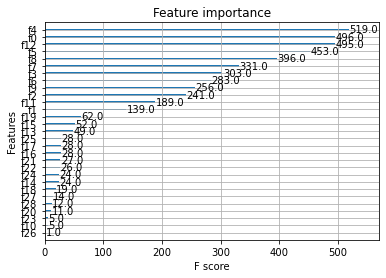

In [197]:
from xgboost import plot_importance
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
plt.show((20,12))

In [199]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 90.67%
Thresh=0.002, n=29, Accuracy: 90.67%
Thresh=0.011, n=28, Accuracy: 90.66%
Thresh=0.017, n=27, Accuracy: 90.67%
Thresh=0.017, n=26, Accuracy: 90.67%
Thresh=0.018, n=25, Accuracy: 90.67%
Thresh=0.018, n=24, Accuracy: 90.68%
Thresh=0.019, n=23, Accuracy: 90.68%
Thresh=0.020, n=22, Accuracy: 90.66%
Thresh=0.020, n=21, Accuracy: 90.68%
Thresh=0.021, n=20, Accuracy: 90.68%
Thresh=0.023, n=19, Accuracy: 90.66%
Thresh=0.025, n=18, Accuracy: 90.65%
Thresh=0.025, n=17, Accuracy: 90.66%
Thresh=0.027, n=16, Accuracy: 90.61%
Thresh=0.028, n=15, Accuracy: 90.61%
Thresh=0.029, n=14, Accuracy: 90.62%
Thresh=0.031, n=13, Accuracy: 90.61%
Thresh=0.033, n=12, Accuracy: 90.62%
Thresh=0.037, n=11, Accuracy: 90.61%
Thresh=0.038, n=10, Accuracy: 90.62%
Thresh=0.040, n=9, Accuracy: 90.63%
Thresh=0.042, n=8, Accuracy: 90.62%
Thresh=0.045, n=7, Accuracy: 90.61%
Thresh=0.049, n=6, Accuracy: 90.62%
Thresh=0.052, n=5, Accuracy: 90.60%
Thresh=0.058, n=4, Accuracy: 90.61%
Thresh=0.067, n=3, Accuracy

In [200]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [201]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [202]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [208]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, use_label_encoder=False)

In [209]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)

timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[00:58:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 8 minutes and 53.74 seconds.


In [210]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 68.07539956, 127.50717894, 115.56352909,  81.84565131,
       107.49140024]), 'std_fit_time': array([0.09126947, 0.3141684 , 2.7157704 , 0.13700159, 2.93333312]), 'mean_score_time': array([0.30621862, 0.63962197, 0.62968262, 0.76461824, 0.36441668]), 'std_score_time': array([0.00806518, 0.02791564, 0.01969228, 0.02208044, 0.04781209]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?

[00:51:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:51:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.753 total time= 1.1min
[00:52:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "silent" } mig

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42, use_label_encoder=False
)

In [243]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 1000, 40),
    'learning_rate': [0.1, 0.01, 0.05,1]
}

In [244]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 2,
    verbose=True
)

In [245]:
start_time = timer(None)
grid_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 2 folds for each of 768 candidates, totalling 1536 fits
[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:17] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:49] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:49] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:43] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:01] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:43] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:33] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:32] WARNING: /Users/runner/miniforge3/cond

[12:24:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:16] WARNING: /Users/runner/miniforge3/cond

[15:00:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:18] WARNING: /Users/runner/miniforge3/cond

[15:05:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:02] WARNING: /Users/runner/miniforge3/cond

[14:56:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:53] WARNING: /Users/runner/miniforge3/cond

[15:10:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:22] WARNING: /Users/runner/miniforge3/cond

[15:00:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:04] WARNING: /Users/runner/miniforge3/cond

[15:24:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:03] WARNING: /Users/runner/miniforge3/cond

[15:07:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:21] WARNING: /Users/runner/miniforge3/cond

[15:30:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:51] WARNING: /Users/runner/miniforge3/cond

[15:14:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:02] WARNING: /Users/runner/miniforge3/cond

[15:44:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:46] WARNING: /Users/runner/miniforge3/cond

[17:45:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:49:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:20] WARNING: /Users/runner/miniforge3/cond

[19:11:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:56] WARNING: /Users/runner/miniforge3/cond

[19:00:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:02:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:11:04] WARNING: /Users/runner/miniforge3/cond

[18:06:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/runner/miniforge3/cond

[18:28:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:44] WARNING: /Users/runner/miniforge3/cond


 Time taken: 10 hours 23 minutes and 54.72 seconds.


In [246]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=980, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [248]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=980, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1.)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=980, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1.0, ...)

In [249]:
cl.fit(X_train, y_train)
y_pred_2 = cl.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     97951
           1       0.64      0.02      0.04     10135

    accuracy                           0.91    108086
   macro avg       0.77      0.51      0.49    108086
weighted avg       0.88      0.91      0.87    108086



In [253]:
param_grid={
           'model__max_depth': [8],
           'model__n_estimators': [100],
           'model__learning_rate': [0.05],
           'model__gamma': [5],
           'model__reg_lambda': [10],
             'model__reg_alpha':[0.001],
           'model__scale_pos_weight': [3],
           'model__subsample': [0.7],
           'model__colsample_bytree': [0.8],
           'model__max_delta_step': [2]
}

xgb_11 = XGBClassifier(**param_grid)

In [254]:
xgb_11.fit(X_train, y_train)
y_pred_3 = xgb_11.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

[19:58:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "model__colsample_bytree", "model__gamma", "model__learning_rate", "model__max_delta_step", "model__max_depth", "model__n_estimators", "model__reg_alpha", "model__reg_lambda", "model__scale_pos_weight", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     97951
           1       0.55      0.03      0.06     10135

    accuracy                           0.91    108086
   macro avg       0.73      0.51      0.51    108086
weighted avg       0.87      0.91      0.87    108086



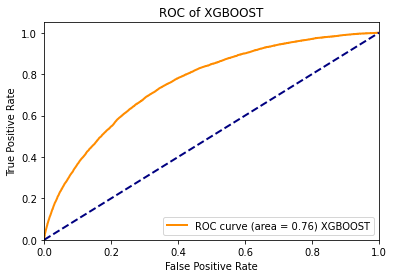

In [258]:
from sklearn.metrics import roc_curve, auc

y_score_xgb = xgb_11.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f) XGBOOST" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of XGBOOST")
plt.legend(loc="lower right")

# plt.savefig('./figures/q52_Xgboost_ROC.png')
plt.show()

In [ ]:
c=a[~a.isin([np.nan, np.inf, -np.inf]).any(1)]
condn=~a.isin([np.nan, np.inf, -np.inf]).any(1)
b_new=b[condn]

In [ ]:
c[c.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
condn

In [ ]:
c

In [ ]:
b_new

In [190]:
def abc(X_test):
#model percentile
    lr_probs = xgb_clf_2.predict_proba(X_test)
    n = len(lr_probs)
    x_axis = np.arange(n)[::-1]*(100/n)
    print(x_axis)

    print(lr_probs)
    lr_probs_y = lr_probs[:, 1]
    lr_probs_y[::-1].sort()
    print(sum(lr_probs_y))
    print(lr_probs_y)
    lr_probs_y_sum = np.cumsum(lr_probs_y)
    #print(lr_probs_y_sum)

    plt.figure()
    plt.grid()
    plt.plot(
        x_axis,
        lr_probs_y,
    )
    plt.xlim([100, 0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Shot prob model percentile")
    plt.ylabel("Goals / (Shots + Goals)")
    plt.title("Goal Rate of Logistic Regression")
    plt.show()

    #cumulative plot
    plt.figure()
    plt.grid()
    plt.plot(
        x_axis,
        lr_probs_y_sum/sum(lr_probs_y),
    )
    plt.xlim([100, 0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Shot prob model percentile")
    plt.ylabel("Proportion")
    plt.title("Cumulative % of goals")
    plt.show()

[9.99990748e+01 9.99981496e+01 9.99972244e+01 ... 1.85037840e-03
 9.25189201e-04 0.00000000e+00]
[[0.97780246 0.02219757]
 [0.9486377  0.05136228]
 [0.984575   0.01542501]
 ...
 [0.99480575 0.00519423]
 [0.88804007 0.11195993]
 [0.89011693 0.10988306]]
9586.040850664707
[9.9071175e-01 9.8902202e-01 9.8804116e-01 ... 2.5938698e-05 2.0507201e-05
 1.5972817e-05]


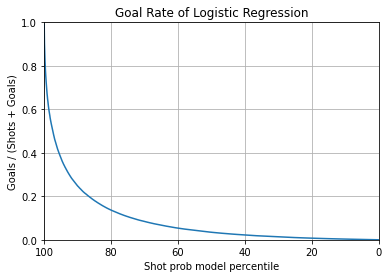

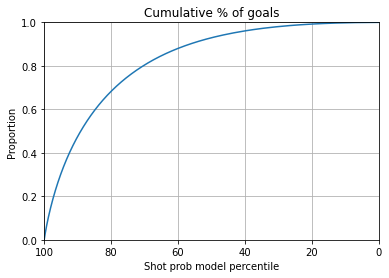

In [191]:
abc(X_test)

In [ ]:
xgb_clf_1 = XGBClassifier()

In [ ]:
a = X_train.astype('float')
b = y_train.astype('int')

xgb_clf_1.fit(a,b)

## 6. Give it your best shot! (25%)

## 7. Evaluate on test set (10%)

## 8. Blog Post (upto 30% penalty)